In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 739 kB/s 


In [ ]:
# load cleaned train.csv with features
train_with_features = pd.read_csv("../data/train_with_features.csv")

**Model 1: Recommender system using KNN algorithm**

Using KNN algorithm to find the most similar listings by listing attributes.

In [ ]:
from KNN_recommender import KNNRecommender

KNN_recommender = KNNRecommender()
KNN_recommender.fit(train_with_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# calculate overall alignment for all listing and respective top 10 recommendations
# calculate avg pairwise distance between all sets of recommendations (top 10 recommendations)
overall_alignment_score, avg_pairwise_dist = KNN_recommender.get_overall_alignment_score(train_with_features)

In [ ]:
# get overall alignment score and overall avg pairwise distance
print(f"overall_alignment_score: {overall_alignment_score}%")
print(f"avg_pairwise_dist: {avg_pairwise_dist}")

overall_alignment_score: 90.63576356146707%
avg_pairwise_dist: 0.33055221223458875


In [ ]:
# Pick a row id of choice
row_id = 10
#row_id = 20
#row_id = 30
#row_id = 40
#row_id = 50

# Get the row from the dataframe (an valid row ids will throw an error)
row = train_with_features.iloc[row_id]

# Just for printing it nicely, we create a new dataframe from this single row
pd.DataFrame([row])

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,...,subzone_num_ns,subzone_num_te,planning_area_num_cc,planning_area_num_ce,planning_area_num_cg,planning_area_num_dt,planning_area_num_ew,planning_area_num_ne,planning_area_num_ns,planning_area_num_te
10,950151,5 bed condo for sale in amber park,18a amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_top_recommendations(row, k=10, verbose=False):
  
   return KNN_recommender.transform(X=row, k=k, verbose=verbose)

In [ ]:
k = 3

df_recommendations = get_top_recommendations(row, k=k)

df_recommendations.head(k)

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1247,969270,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5302500.0
1289,200300,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5431600.0
1250,585592,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5447400.0


In [ ]:
# verbose recommendations with aligment scores for all attributes
recommended = get_top_recommendations(row, k=k, verbose=True)
recommended

========================== Alignment ========================== 
Price (within +-20%): 100.0 %
Area Sqrt (within +-20%): 100.0%
planning_area (same): 100.0%
subzone (same): 100.0%
property_type (same): 100.0%
tenure (same): 100.0%
num_beds (same): 100.0%
num_baths (same): 100.0%
subzone_num_pri_sch (same): 100.0%
planning_area_num_pri_sch (same): 100.0%
subzone_num_sec_sch (same): 100.0%
planning_area_num_sec_sch (same): 100.0%
subzone_num_malls (same): 100.0%
planning_area_num_malls (same): 100.0%
subzone_num_comm (same): 100.0%
planning_area_num_comm (same): 100.0%
subzone_num_BN (same): 100.0%
subzone_num_CR (same): 100.0%
subzone_num_IEBP (same): 100.0%
subzone_num_IHL (same): 100.0%
planning_area_num_BN (same): 100.0%
planning_area_num_CR (same): 100.0%
planning_area_num_IEBP (same): 100.0%
planning_area_num_IHL (same): 100.0%
subzone_num_mrt (same): 100.0%
planning_area_num_mrt (same): 100.0%
subzone_num_cc (same): 100.0%
subzone_num_ce (same): 100.0%
subzone_num_cg (same): 100.0

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1247,969270,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5302500.0
1289,200300,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5431600.0
1250,585592,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5447400.0


**Model 2: Recommender system using K-means algorithm**

In [ ]:
from Kmeans_recommender import KMeansRecommender

KMeans_recommender = KMeansRecommender()
KMeans_recommender.fit(train_with_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
## perform elbow method on 30 clusters to get best n_clusters

from sklearn.cluster import KMeans
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
# A list holds the SSE values for each k
sse = []
for k in range(1, 31):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(KMeans_recommender.X_to_compare)
   sse.append(kmeans.inertia_)

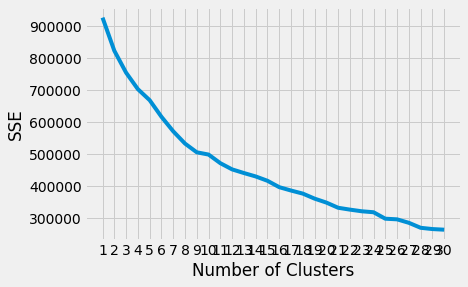

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 31), sse)
plt.xticks(range(1, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# using 24 clusters from elbow method
overall_Kmeans_alignment_score, avg_pairwise_dist = KMeans_recommender.get_overall_alignment_score(train_with_features)

In [ ]:
# calculate overall alignment for all listing and respective top 10 recommendations
# calculate avg pairwise distance between all sets of recommendations (top 10 recommendations)

print(f"overall_Kmeans_alignment_score: {overall_Kmeans_alignment_score}%")
print(f"avg_pairwise_dist: {avg_pairwise_dist}")

overall_Kmeans_alignment_score: 38.1207504094496%
avg_pairwise_dist: 4.91075570919479


In [ ]:
### increase number of clusters and comapre performance 
from Kmeans_recommender import KMeansRecommender
KMeans_recommender_more_clusters = KMeansRecommender(num_clusters=200)
KMeans_recommender_more_clusters.fit(train_with_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# using 200 clusters
# calculate overall alignment for all listing and respective top 10 recommendations
# calculate avg pairwise distance between all sets of recommendations (top 10 recommendations)

overall_Kmeans_more_clusters_alignment_score, avg_pairwise_dist = KMeans_recommender_more_clusters.get_overall_alignment_score(train_with_features)

In [ ]:
print(f"overall_Kmeans_more_clusters_alignment_score: {overall_Kmeans_more_clusters_alignment_score}%")
print(f"avg_pairwise_dist: {avg_pairwise_dist}")

overall_Kmeans_more_clusters_alignment_score: 63.31543025294888%
avg_pairwise_dist: 1.6986680644503975


In [ ]:
def get_top_recommendations_kmeans(row_id, k=10, verbose=False):
  
   return KMeans_recommender_more_clusters.transform(idx=row_id, k=k, verbose=verbose)

In [ ]:
k = 3

df_recommendations_kmeans = get_top_recommendations_kmeans(row_id, k=k)

df_recommendations_kmeans.head(k)

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1293,367116,2 bed condo for sale in coastline residences,7 amber road,coastline residences,condo,999-year leasehold,2.0,2.0,710.0,https://www.99.co/singapore/condos-apartments/...,1.301364,103.901310,marine parade,marine parade,1938300.0
1333,992048,1 bed condo for sale in amber skye,8 amber road,amber skye,condo,999-year leasehold,1.0,1.0,635.0,https://www.99.co/singapore/condos-apartments/...,1.299672,103.898086,marine parade,marine parade,1669500.0
1240,965046,4 bed condo for sale in amber sea,30 amber gardens,amber sea,condo,999-year leasehold,4.0,4.0,1528.0,https://www.99.co/singapore/condos-apartments/...,1.301104,103.898542,marine parade,marine parade,3990000.0


In [ ]:
df_recommendations_kmeans_verbose = get_top_recommendations_kmeans(row_id, k=k, verbose=True)
df_recommendations_kmeans_verbose.head(k)

kmeans.labels_:  [ 59  75  75 ... 150 150 150]
target_cluster:  75
number of elements in each cluster: 
[[  0  37]
 [  1  50]
 [  2 227]
 [  3 140]
 [  4 173]
 [  5 104]
 [  6  88]
 [  7  70]
 [  8  21]
 [  9 167]
 [ 10  73]
 [ 11  47]
 [ 12  81]
 [ 13 120]
 [ 14 116]
 [ 15 130]
 [ 16 101]
 [ 17 187]
 [ 18  39]
 [ 19  16]
 [ 20 131]
 [ 21 151]
 [ 22  60]
 [ 23  50]
 [ 24  12]
 [ 25  24]
 [ 26 118]
 [ 27  62]
 [ 28  29]
 [ 29 101]
 [ 30  98]
 [ 31   2]
 [ 32 112]
 [ 33  71]
 [ 34  41]
 [ 35  97]
 [ 36 163]
 [ 37   2]
 [ 38 191]
 [ 39  77]
 [ 40  53]
 [ 41  71]
 [ 42 193]
 [ 43 185]
 [ 44 280]
 [ 45  82]
 [ 46 200]
 [ 47  81]
 [ 48 199]
 [ 49  62]
 [ 50 308]
 [ 51  50]
 [ 52 303]
 [ 53  62]
 [ 54  77]
 [ 55  80]
 [ 56  13]
 [ 57   9]
 [ 58  38]
 [ 59 330]
 [ 60 148]
 [ 61  53]
 [ 62  38]
 [ 63  65]
 [ 64 102]
 [ 65 120]
 [ 66  34]
 [ 67  38]
 [ 68 208]
 [ 69 122]
 [ 70 162]
 [ 71  15]
 [ 72  69]
 [ 73  14]
 [ 74 169]
 [ 75 260]
 [ 76  61]
 [ 77  92]
 [ 78 135]
 [ 79  71]
 [ 80 232]
 [ 81

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
6833,981257,hdb flat for sale in 6 marine terrace,east coast / marine parade (d15),marine terrace walk,hdb,99-year leasehold,3.0,1.0,699.0,https://www.99.co/singapore/hdb/marine-terrace...,1.303796,103.916433,marine parade,marine parade,459900.0
19574,397734,3 bed condo for sale in the parc condominium,3 west coast walk,the parc condominium,condo,999-year leasehold,3.0,3.0,1302.0,https://www.99.co/singapore/condos-apartments/...,1.309958,103.761200,clementi,clementi central,2415000.0
6806,313662,hdb flat for sale in 20 marine terrace,east coast / marine parade (d15),marine terrace breeze,hdb,99-year leasehold,3.0,2.0,947.0,https://www.99.co/singapore/hdb/marine-terrace...,1.303737,103.915062,marine parade,marine parade,682500.0


**Model 3: Recommender system using AGNES**

In [ ]:
from Agnes_recommender import AgnesRecommender
Agnes_recommender = AgnesRecommender()
Agnes_recommender.fit(train_with_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# calculate overall alignment for all listing and respective top 10 recommendations
# calculate avg pairwise distance between all sets of recommendations (top 10 recommendations)

overall_agnes_alignment_score, avg_pairwise_dist = Agnes_recommender.get_overall_alignment_score(train_with_features)

In [ ]:
print(f"overall_agnes_alignment_score: {overall_agnes_alignment_score}%")
print(f"avg_pairwise_dist: {avg_pairwise_dist}")

overall_agnes_alignment_score: 69.20692994925896%
avg_pairwise_dist: 1.1577827290506975


In [ ]:
def get_top_recommendations_agnes(row_id, k=10, verbose=False):
  
   return Agnes_recommender.transform(idx=row_id, k=k, verbose=verbose)

In [ ]:
k = 3

df_recommendations_agnes = get_top_recommendations_agnes(row_id, k=k)

df_recommendations_agnes.head(k)

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1289,200300,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5431600.0
1216,590879,4 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,4.0,1.0,1302.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,3299100.0
1267,549328,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,5.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0


In [ ]:
df_recommendations_agnes_verbose = get_top_recommendations_agnes(row_id, k=k, verbose=True)
df_recommendations_agnes_verbose.head(k)

agnes_clustering.labels_:  [176  33  33 ... 245 245 245]
target_cluster:  33
number of elements in each cluster: 
[[  0  79]
 [  1  21]
 [  2  54]
 [  3 132]
 [  4   8]
 [  5  69]
 [  6 248]
 [  7  74]
 [  8  52]
 [  9 104]
 [ 10  88]
 [ 11  92]
 [ 12  65]
 [ 13 111]
 [ 14 189]
 [ 15 137]
 [ 16  25]
 [ 17  92]
 [ 18  48]
 [ 19  92]
 [ 20  32]
 [ 21  85]
 [ 22  79]
 [ 23  38]
 [ 24  80]
 [ 25  35]
 [ 26  18]
 [ 27  70]
 [ 28  42]
 [ 29  68]
 [ 30 167]
 [ 31  39]
 [ 32  34]
 [ 33 134]
 [ 34  61]
 [ 35  88]
 [ 36  15]
 [ 37  44]
 [ 38 216]
 [ 39  77]
 [ 40  52]
 [ 41  67]
 [ 42  66]
 [ 43  92]
 [ 44 164]
 [ 45  77]
 [ 46 145]
 [ 47 154]
 [ 48  58]
 [ 49  49]
 [ 50 173]
 [ 51 109]
 [ 52 122]
 [ 53   2]
 [ 54  82]
 [ 55  83]
 [ 56 163]
 [ 57  62]
 [ 58  67]
 [ 59 132]
 [ 60  26]
 [ 61  75]
 [ 62  48]
 [ 63  65]
 [ 64 198]
 [ 65  40]
 [ 66  98]
 [ 67  35]
 [ 68  49]
 [ 69 231]
 [ 70 164]
 [ 71  80]
 [ 72  75]
 [ 73 112]
 [ 74  66]
 [ 75   9]
 [ 76  61]
 [ 77 207]
 [ 78  21]
 [ 79 192]
 [ 80 

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1261,395718,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5273100.0
1269,142814,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0
1266,127792,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,5.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0


**Model 4: Recommender system using DBScan**

In [ ]:
from DBScan_recommender import DBScanRecommender

DBScan_recommender = DBScanRecommender()
DBScan_recommender.fit(train_with_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
overall_DBScan_alignment_score, avg_pairwise_dist = DBScan_recommender.get_overall_alignment_score(train_with_features)

In [ ]:
print(f"overall_DBScan_alignment_score: {overall_DBScan_alignment_score}%")
print(f"avg_pairwise_dist: {avg_pairwise_dist}")

overall_DBScan_alignment_score: 64.70048141346965%
avg_pairwise_dist: 3.669865431207364


In [ ]:
def get_top_recommendations_dbscan(row_id, k=10, verbose=False):
  
   return DBScan_recommender.transform(idx=row_id, k=k, verbose=verbose)

In [ ]:
k = 3

df_recommendations_dbscan = get_top_recommendations_dbscan(row_id, k=k)

df_recommendations_dbscan.head(k)

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
6,174746,5 bed condo for sale in amber park,18a amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
1250,585592,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5447400.0
8,952651,5 bed condo for sale in amber park,18a amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2336.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5932200.0


In [ ]:
df_recommendations_dbscan_verbose = get_top_recommendations_dbscan(row_id, k=k, verbose=True)
df_recommendations_dbscan_verbose.head(k)

dbscan.labels_:  [-1 -1 -1 ... 16 17 -1]
target_cluster:  0
number of elements in each cluster: 
[[  -1 7790]
 [   0   34]
 [   1   14]
 [   2   43]
 [   3   11]
 [   4   16]
 [   5   24]
 [   6   49]
 [   7   26]
 [   8   25]
 [   9   17]
 [  10   23]
 [  11   60]
 [  12   24]
 [  13   23]
 [  14   11]
 [  15   29]
 [  16   22]
 [  17   24]
 [  18   11]
 [  19   12]
 [  20   51]
 [  21   20]
 [  22   41]
 [  23   62]
 [  24   15]
 [  25   13]
 [  26   17]
 [  27   13]
 [  28   17]
 [  29   11]
 [  30  151]
 [  31   33]
 [  32   44]
 [  33   13]
 [  34   14]
 [  35   14]
 [  36   14]
 [  37   14]
 [  38   62]
 [  39   17]
 [  40   16]
 [  41   13]
 [  42   14]
 [  43   18]
 [  44   16]
 [  45   63]
 [  46   14]
 [  47   26]
 [  48   41]
 [  49   15]
 [  50   12]
 [  51   16]
 [  52   12]
 [  53   22]
 [  54   12]
 [  55   31]
 [  56   19]
 [  57   11]
 [  58   33]
 [  59   12]
 [  60   51]
 [  61   39]
 [  62   48]
 [  63   17]
 [  64   12]
 [  65   14]
 [  66   32]
 [  67   45]
 [  68

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1177,409127,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5040000.0
1272,356794,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2336.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5859000.0
1286,528601,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
1258,716250,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0
1254,187656,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5706800.0
1236,359048,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5477800.0
1255,277385,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
1269,142814,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0
1197,783057,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
4,225229,5 bed condo for sale in amber park,18a amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5040900.0


**Model 4b: Recommender system using DBScan + KNN**

In [ ]:
from DBScan_KNN_recommender import DBScanKNNRecommender
DBScan_KNN_recommender = DBScanKNNRecommender()
DBScan_KNN_recommender.fit(train_with_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
overall_dbscan_knn_alignment_score, avg_pairwise_dist = DBScan_KNN_recommender.get_overall_alignment_score(train_with_features)

In [ ]:
print(f"overall_dbscan_knn_alignment_score: {overall_dbscan_knn_alignment_score}%")
print(f"avg_pairwise_dist: {avg_pairwise_dist}")

overall_dbscan_knn_alignment_score: 87.6842494555534%
avg_pairwise_dist: 0.30700122410912695


In [ ]:
def get_top_recommendations_dbscan_knn(row_id, k=10, verbose=False):
  
   return DBScan_KNN_recommender.transform(idx=row_id, k=k, verbose=verbose)

In [ ]:
k = 3

df_recommendations_dbscan_knn = get_top_recommendations_dbscan_knn(row_id, k=k)

df_recommendations_dbscan_knn.head(k)

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1276,886324,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
1261,395718,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5273100.0
1254,187656,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5706800.0


In [ ]:
k=20

In [ ]:
df_recommendations_dbscan_knn_verbose = get_top_recommendations_dbscan_knn(row_id, k=k, verbose=True)
df_recommendations_dbscan_knn_verbose.head(k)

dbscan.labels_:  [-1 -1 -1 ... 11 12 -1]
target_cluster:  0
number of elements in each cluster: 
[[   -1 10899]
 [    0    34]
 [    1    43]
 [    2    24]
 [    3    49]
 [    4    26]
 [    5    25]
 [    6    23]
 [    7    60]
 [    8    24]
 [    9    23]
 [   10    29]
 [   11    22]
 [   12    24]
 [   13    51]
 [   14    41]
 [   15    62]
 [   16   151]
 [   17    33]
 [   18    44]
 [   19    62]
 [   20    63]
 [   21    41]
 [   22    26]
 [   23    22]
 [   24    31]
 [   25    33]
 [   26    51]
 [   27    39]
 [   28    48]
 [   29    32]
 [   30    45]
 [   31    24]
 [   32    21]
 [   33    63]
 [   34    52]
 [   35    67]
 [   36    31]
 [   37    33]
 [   38    30]
 [   39   137]
 [   40    36]
 [   41   108]
 [   42    47]
 [   43    90]
 [   44    24]
 [   45    26]
 [   46    40]
 [   47    26]
 [   48    29]
 [   49    45]
 [   50    28]
 [   51    34]
 [   52    25]
 [   53    39]
 [   54    68]
 [   55    21]
 [   56    27]
 [   57    35]
 [   58    27]
 [ 

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1236,359048,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5477800.0
1213,834159,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
6,174746,5 bed condo for sale in amber park,18a amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0
1268,794826,5 bed condo for sale in amber park,14 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2325.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,6129900.0
1274,318143,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0
1249,717565,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5693200.0
1243,120806,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2142.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5477800.0
4,225229,5 bed condo for sale in amber park,18a amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5040900.0
1269,142814,5 bed condo for sale in amber park,18 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5250000.0
1197,783057,5 bed condo for sale in amber park,16 amber gardens,amber park,condo,999-year leasehold,5.0,4.0,2045.0,https://www.99.co/singapore/condos-apartments/...,1.300581,103.899394,marine parade,marine parade,5336100.0


**Final model chosen: recommender using KNN**

In [ ]:
def get_top_recommendations(row, k=10, verbose=False):
  
   return KNN_recommender.transform(X=row, k=k, verbose=verbose)

In [ ]:
# Pick a row id of choice
#row_id = 10
row_id = 20
#row_id = 30
#row_id = 40
#row_id = 50

# Get the row from the dataframe (an valid row ids will throw an error)
row = train_with_features.iloc[row_id]

# Just for printing it nicely, we create a new dataframe from this single row
pd.DataFrame([row])

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,...,subzone_num_ns,subzone_num_te,planning_area_num_cc,planning_area_num_ce,planning_area_num_cg,planning_area_num_dt,planning_area_num_ew,planning_area_num_ne,planning_area_num_ns,planning_area_num_te
20,409309,2 bed condo for sale in royalgreen,2a anamalai avenue,royalgreen,condo,999-year leasehold,2.0,2.0,861.0,https://www.99.co/singapore/condos-apartments/...,...,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [ ]:
k = 3

df_recommendations = get_top_recommendations(row, k=k)

df_recommendations.head(k)

,listing_id,title,address,property_name,property_type,tenure,num_beds,num_baths,size_sqft,property_details_url,lat,lng,planning_area,subzone,price
1366,714318,2 bed condo for sale in royalgreen,2 anamalai avenue,royalgreen,condo,999-year leasehold,2.0,2.0,818.0,https://www.99.co/singapore/condos-apartments/...,1.330403,103.794939,bukit timah,holland road,2463800.0
1361,825201,2 bed condo for sale in royalgreen,2 anamalai avenue,royalgreen,condo,999-year leasehold,2.0,2.0,818.0,https://www.99.co/singapore/condos-apartments/...,1.330403,103.794939,bukit timah,holland road,2447900.0
29,232178,2 bed condo for sale in royalgreen,2a anamalai avenue,royalgreen,condo,999-year leasehold,2.0,2.0,818.0,https://www.99.co/singapore/condos-apartments/...,1.330403,103.794939,bukit timah,holland road,2413000.0
